In [3]:
# import Pandas and Numpy for data processing
import pandas as pd
import numpy as np

# import matloit for visualisazion
import matplotlib.pyplot as plt

# import common modules
import sys
import re
import csv
import datetime

# reading source file name form 1st argument 
inputfile = 'netflow.csv'
        
# reading csv file with pandas, ignoring bad lines tokenization errors
df = pd.read_csv(inputfile,sep = ',',decimal=".",error_bad_lines=False,low_memory=False)
#df['Инициатор звонка'] = df['Инициатор звонка'].astype('object')
#df['Принимающий номер'] = df['Принимающий номер'].astype('object')
#df['Размер начислений'] = df['Размер начислений'].astype('int64',errors='ignore')
#df['Объем трафика в МБ'] = df['Объем трафика в МБ'].astype('int64',errors='ignore')

In [4]:
# showing first 5 rows - jupyter only
df.head()

,timestamp,source,message,nf_bytes,nf_direction,nf_dst,nf_dst_address,nf_dst_as,nf_dst_mask,nf_dst_port,...,nf_src,nf_src_address,nf_src_as,nf_src_mask,nf_src_port,nf_src_tos,nf_start,nf_stop,nf_tcp_flags,nf_version
0,2020-02-11T11:06:04.104Z,10.130.251.189,NetFlowV9 [10.156.65.127]:52086 <> [10.128.165...,472,1,10.128.165.247:60002,10.128.165.247,0,8,60002,...,10.156.65.127:52086,10.156.65.127,0,23,52086,0,2020-02-11T11:05:47.300Z,2020-02-11T11:05:48.052Z,24,9
1,2020-02-11T11:06:04.104Z,10.130.251.189,NetFlowV9 [10.156.64.109]:65404 <> [10.107.147...,488,1,10.107.147.12:135,10.107.147.12,0,8,135,...,10.156.64.109:65404,10.156.64.109,0,23,65404,0,2020-02-11T11:05:47.304Z,2020-02-11T11:05:48.020Z,24,9
2,2020-02-11T11:06:04.104Z,10.130.251.189,NetFlowV9 [10.156.64.107]:53005 <> [10.103.195...,71,0,10.103.195.254:53,10.103.195.254,0,8,53,...,10.156.64.107:53005,10.156.64.107,0,23,53005,0,2020-02-11T11:05:47.388Z,2020-02-11T11:05:47.388Z,16,9
3,2020-02-11T11:06:04.104Z,10.130.251.189,NetFlowV9 [10.103.195.254]:53 <> [10.156.64.73...,244,0,10.156.64.73:53117,10.156.64.73,0,23,53117,...,10.103.195.254:53,10.103.195.254,0,8,53,72,2020-02-11T11:05:46.600Z,2020-02-11T11:05:46.600Z,16,9
4,2020-02-11T11:06:04.104Z,10.130.251.189,NetFlowV9 [10.103.195.254]:53 <> [10.156.64.73...,197,0,10.156.64.73:55007,10.156.64.73,0,23,55007,...,10.103.195.254:53,10.103.195.254,0,8,53,72,2020-02-11T11:05:46.604Z,2020-02-11T11:05:46.604Z,16,9


In [5]:
# dimensions of data set
print("Dimensions:")
print(df.shape)

# data columns
print("Columns:")
print(df.columns)

# data frame info
print("Data Frame Info:")
print(df.info())

Dimensions:
(197653, 41)
Columns:
Index(['timestamp', 'source', 'message', 'nf_bytes', 'nf_direction', 'nf_dst',
       'nf_dst_address', 'nf_dst_as', 'nf_dst_mask', 'nf_dst_port',
       'nf_field_51', 'nf_first_switched', 'nf_flow_packet_id',
       'nf_flow_sampler_id', 'nf_in_bytes', 'nf_in_pkts', 'nf_input_snmp',
       'nf_ipv4_dst_addr', 'nf_ipv4_next_hop', 'nf_ipv4_src_addr',
       'nf_l4_dst_port', 'nf_l4_src_port', 'nf_last_switched', 'nf_next_hop',
       'nf_output_snmp', 'nf_pkts', 'nf_proto', 'nf_proto_name', 'nf_protocol',
       'nf_snmp_input', 'nf_snmp_output', 'nf_src', 'nf_src_address',
       'nf_src_as', 'nf_src_mask', 'nf_src_port', 'nf_src_tos', 'nf_start',
       'nf_stop', 'nf_tcp_flags', 'nf_version'],
      dtype='object')
Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197653 entries, 0 to 197652
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   timesta

In [19]:
#Grouping - slow
#columns_to_show = ['Размер начислений','Объем трафика в МБ']
#df.groupby(['Описание услуги']).sum()[columns_to_show]

# Pivot is faster and supports aggregation
df.pivot_table(['nf_pkts','nf_bytes'],index=['nf_direction','nf_proto','nf_src_port','nf_dst_port','nf_dst_address','nf_src_address'],aggfunc='sum', fill_value = 0, margins=True,margins_name= 'Grand Total')
#df.pivot_table(['Размер начислений','Объем трафика в МБ'],index=['Описание услуги'],aggfunc='sum', fill_value = 0, margins=True,margins_name= 'Grand Total')

nf_bytes  \
nf_direction nf_proto nf_src_port nf_dst_port nf_dst_address nf_src_address               
0            1        0           0           10.102.129.70  10.156.64.109          180   
                                              10.102.180.106 10.156.64.1          10500   
                                              10.102.180.230 10.156.64.17           756   
                                                             10.156.64.18           756   
                                                             10.156.64.22           756   
...                                                                                 ...   
1            17       65420       53          10.107.147.123 10.156.64.109          208   
                                              10.128.63.126  10.156.64.109          208   
                      65489       53          10.107.146.97  10.156.64.108          105   
                      65535       53          10.107.146.97  10.156.64.108          159   
Grand Total                                                                  3026336041   

                                                                             nf_pkts  
nf_direction nf_proto nf_src_port nf_dst_port nf_dst_address nf_src_address           
0            1        0           0           10.102.129.70  10.156.64.109         3  
                                              10.102.180.106 10.156.64.1         175  
                                              10.102.180.230 10.156.64.17          9  
                                                             10.156.64.18          9  
                                                             10.156.64.22          9  
...                                                                              ...  
1            17       65420       53          10.107.147.123 10.156.64.109         2  
                                              10.128.63.126  10.156.64.109         2  
                      65489       53          10.107.146.97  10.156.64.108         1  
                      65535       53          10.107.146.97  10.156.64.108         1  
Grand Total                                                                  4852332  

[78197 rows x 2 columns]

In [20]:
#df.pivot_table(['Описание услуги'],['Размер начислений'],['Объем трафика в МБ'], aggfunc='sum', fill_value = 0)
#pivot=df.pivot_table(['Размер начислений','Объем трафика в МБ'],index=['Номер абонента','Описание услуги'],aggfunc='sum', fill_value = 0, margins=True,margins_name= 'Grand Total')
pivot=df.pivot_table(['nf_pkts','nf_bytes'],index=['nf_direction','nf_proto','nf_src_port','nf_dst_port','nf_dst_address','nf_src_address'],aggfunc='sum', fill_value = 0, margins=True,margins_name= 'Grand Total')


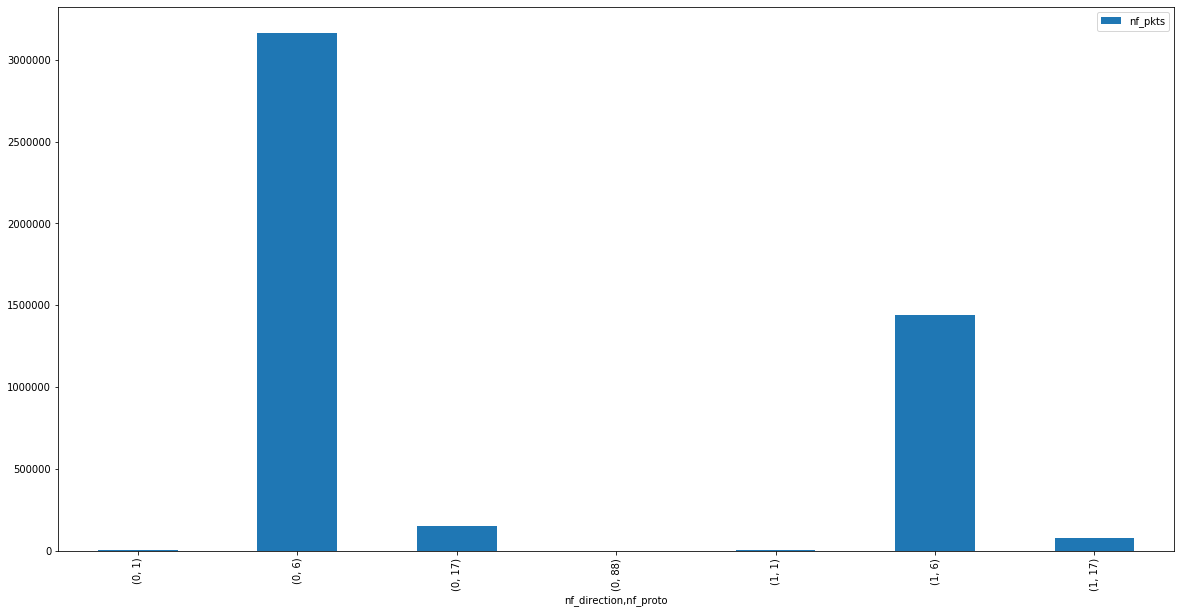

In [22]:
# Not working until Unicode decoding issue can be resovled
#with pd.ExcelWriter('output.xlsx') as writer:
# pivot.to_excel(writer)

#plotting
small_table=df.pivot_table(['nf_pkts'],index=['nf_direction','nf_proto'],aggfunc='sum', fill_value = 0)
#plt.figure(figsize=(20,10))
small_table.plot(kind='bar',figsize=(20,10))
#pivot.plot();

In [21]:

#pivot.to_csv('output_ak.csv', sep=';', na_rep='', header=True, index=True,mode='w', encoding='utf8', compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal=',')
pivot.to_csv('output_netflow.csv', sep=';', na_rep='', header=True, index=True,mode='w', encoding='utf8', compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal=',')